Created by Sanish Bhochhibhoya (04/23/2025)

### Data-Driven FWI

Notebook to perform a prediction using Vantassel and Bhochhibhoya (2025) model.

Requirements:
1) Waveforms must be in .npy format. (or some way to convert your data in numpy matrix format).

How to run these notebooks:
1) Install all the requirements in requirements.txt
2) Have folders - data and fwiprepostai, and notebooks in the same directory.

In [20]:
import pandas as pd
import numpy as np
import os, pprint
import matplotlib.pyplot as plt
import seiskit.data_driven_fwi_models as fwi_models
import seiskit.data_analysis as data_analysis

to_waveform_model_wt = r'data\model_weights\VantasselAndBhochhibhoya2025.weights.h5'
to_waveform_np_folder = r'data\waveforms\real_field_data_numpy'

raw_waveform = np.load(os.path.join(to_waveform_np_folder, 'drillfield_June28_lisousi.npy'))
proc_waveform_load = np.load(os.path.join(to_waveform_np_folder, 'drillfield_June28_processed.npy'))
vs_pred_load = np.load(os.path.join(to_waveform_np_folder, 'drillfield_June28_prediction.npy'))

# raw_waveform = np.load(os.path.join(to_waveform_np_folder, 'drillfield_Oct18_SiteA7_lisousi.npy'))
# proc_waveform_load = np.load(os.path.join(to_waveform_np_folder, 'drillfield_Oct18_SiteA7_processed.npy'))
# vs_pred_load = np.load(os.path.join(to_waveform_np_folder, 'drillfield_Oct18_SiteA7_prediction.npy'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


<Axes: >

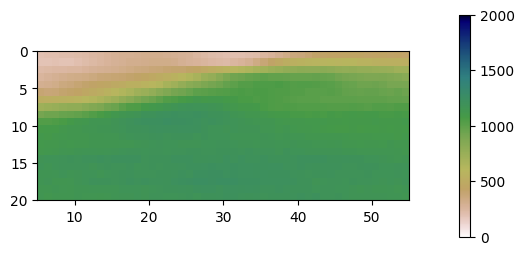

In [21]:
# importlib.reload(fwi_models)
model = fwi_models.VantasselAndBhochhibhoya2025(to_waveform_model_wt)
proc_waveform, vs_pred = data_analysis.get_prediction(model, raw_waveform, 0.020)
data_analysis.plot2d(vs_pred, vmin=0, vmax=2000, extent = [5,55,20,0])

In [22]:
def compare_two_numpy(np_a, np_b, tol=1e-3):
    assert np.sum(np_a - np_b) <= tol, f"Difference greater than tol {tol} - Actual sum of differences = {np.sum(np_a - np_b)}"
    
compare_two_numpy(proc_waveform, proc_waveform_load, tol = 1e-5)
compare_two_numpy(vs_pred, vs_pred_load, tol = 1e-1)